In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

In [3]:
!wget https://gitlab.com/huseinzol05/I4-datascience/raw/master/dataset/TempLinkoping2016.csv

--2018-05-13 09:11:02--  https://gitlab.com/huseinzol05/I4-datascience/raw/master/dataset/TempLinkoping2016.csv
Resolving gitlab.com (gitlab.com)... 52.167.219.168
Connecting to gitlab.com (gitlab.com)|52.167.219.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5963 (5.8K) [text/plain]
Saving to: ‘TempLinkoping2016.csv’

TempLinkoping2016.c 100%[===================>]   5.82K  --.-KB/s    in 0s      

2018-05-13 09:11:02 (49.1 MB/s) - ‘TempLinkoping2016.csv’ saved [5963/5963]



In [46]:
df = pd.read_csv('TempLinkoping2016.csv')
df.head()

time  temp
0  0.002732   0.1
1  0.005464  -4.5
2  0.008197  -6.3
3  0.010929  -9.6
4  0.013661  -9.9

In [0]:
from itertools import combinations_with_replacement

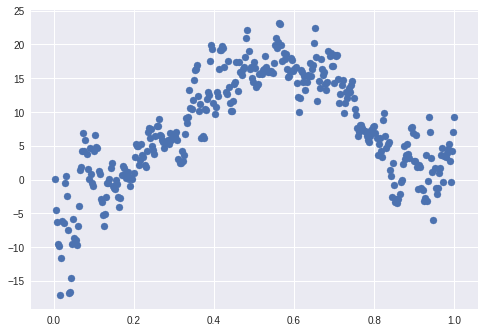

In [11]:
plt.scatter(df.time,df.temp)
plt.show()

In [77]:
poly = 5
X = df.iloc[:, 0:1].values
Y = df.iloc[:,1].values
n_features = X.shape[1]
n_features

1

In [0]:
combs = [combinations_with_replacement(range(n_features), i) for i in range(0, poly + 1)]

In [0]:
flat_combs = [item for sublist in combs for item in sublist]

In [80]:
flat_combs

[(), (0,), (0, 0), (0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0, 0)]

In [81]:
X_new = np.empty((X.shape[0], len(flat_combs)))
for i, index_combs in enumerate(flat_combs):
  X_new[:, i] = np.prod(X[:, index_combs], axis=1)
X_new

array([[1.00000000e+00, 2.73224000e-03, 7.46513542e-06, 2.03965416e-08,
        5.57282468e-11, 1.52262945e-13],
       [1.00000000e+00, 5.46448100e-03, 2.98605526e-05, 1.63172422e-07,
        8.91652602e-10, 4.87241870e-12],
       [1.00000000e+00, 8.19672100e-03, 6.71862352e-05, 5.50706825e-07,
        4.51399019e-09, 3.69999182e-11],
       ...,
       [1.00000000e+00, 9.94535519e-01, 9.89100899e-01, 9.83695975e-01,
        9.78320588e-01, 9.72974573e-01],
       [1.00000000e+00, 9.97267760e-01, 9.94542985e-01, 9.91825655e-01,
        9.89115749e-01, 9.86413248e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00]])

In [82]:
# y_hat = x * m + b
# error function = MSE
# MSE = (y-y_hat)**2
# de_MSE = -2(y-y_hat)
# de_MSE = 2(y_hat-y)
X = X_new
m = np.zeros(X.shape[1])
print(m.shape)
b = 0
learning_rate = 0.001
for i in range(1000):
  y_hat = X.dot(m) + b
  m_gradient = 2 * (y_hat-Y).dot(X)
  b_gradient = np.sum(2*(y_hat-Y))
  m -= learning_rate * m_gradient
  b -= learning_rate * b_gradient
  if (i+1) % 100 == 0:
    print(np.mean((Y-y_hat)**2))

(6,)
24.83704037556766
21.29031171185157
20.573579813568983
20.12892464037687
19.739754329929
19.385159997954595
19.06080978780822
18.76397893992818
18.49228103583385
18.24354445755082


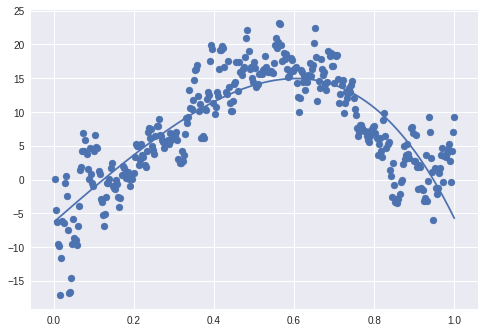

In [84]:
plt.scatter(df.iloc[:,0].values,df.iloc[:,1].values)
plt.plot(df.iloc[:,:1].values,X.dot(m)+b)
plt.show()

In [0]:
def train_gradient_mean_square(epoch, X, Y, learning_rate, degree, b = 0):
    n_features = X.shape[1]
    combs = [combinations_with_replacement(range(n_features), i) for i in range(0, degree + 1)]
    flat_combs = [item for sublist in combs for item in sublist]
    X_new = np.empty((X.shape[0], len(flat_combs)))
    for i, index_combs in enumerate(flat_combs):
        X_new[:, i] = np.prod(X[:, index_combs], axis=1)
    n_output_features = len(flat_combs)
    X = X_new
    m = np.zeros(X.shape[1])
    for i in range(epoch):
        y_hat = X.dot(m) + b
        m_gradient = -(Y - y_hat).dot(X)
        b_gradient = -np.sum((Y - y_hat))
        m -= learning_rate * m_gradient
        b -= learning_rate * b_gradient
        #print(np.mean((Y-y_hat)**2))
    return X_new, m, b

In [0]:
X = df.iloc[:, 0:1].values
Y = df.iloc[:,1].values
X_new, m, b=train_gradient_mean_square(10000,X,Y,0.001,500)

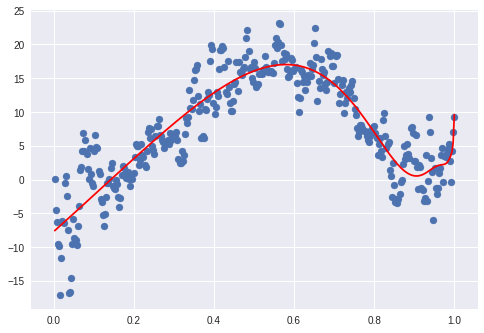

In [102]:
plt.scatter(X[:,0],Y)
plt.plot(X,X_new.dot(m) + b, c='red')
plt.show()

In [0]:
plt.scatter(X[:,0].tolist()+[1.5],Y)
plt.plot(X[:,0].tolist()+[1.5],X_new.dot(m) + b, c='red')
plt.show()